#

# Phase One Project

* Student Name: Paul Mbuitu Muriithi
* DSF-FT05

## MICROSOFT'S NEW MOVIE STUDIO ANALYSIS


### 1. Business Understanding

### a) Introduction

Movies have been a captivating form of entertainment for decades, transporting audiences into different worlds and evoking a range of emotions. The diverse landscape of film genres offers something for everyone, catering to individual preferences and tastes. From heart-pounding action blockbusters to thought-provoking dramas, and from light-hearted comedies to spine-chilling thrillers, each genre brings its own unique appeal and storytelling style.

Understanding the significance of genres in the film industry is crucial for filmmakers, studios, and audiences alike. Genres provide a framework for categorizing films based on their thematic elements, narrative structures, and intended emotional impact. They offer a roadmap for creative expression, allowing filmmakers to tap into established conventions while also pushing boundaries and introducing fresh perspectives.

In a rapidly evolving entertainment landscape, Microsoft has recognized the growing trend of major corporations venturing into original video content creation. Eager to join the excitement, Microsoft has made the decision to establish its own movie studio.

### b) Problem Statement

Microsoft, being relatively unfamiliar with the intricacies of the film industry, it requires a detailed examination of the current landscape to make informed decisions regarding the types of films to produce.

### Main Objective


To explore the types of films that have been performing exceptionally well at the box office and extract actionable insights that can guide the decision-making process for Microsoft's new movie studio.

### Specific objectives

* To find out what movie type 'Genre" are currently most successful.
* To find out what budget amount tends to achieve the highest box office gross.
* To find out when is the most lucrative time of year to release a movie.


### c) Experimental Design

* Data Collection
* Read and check the data
* Cleaning the data
* Exploratory Data Analysis
* Conclusions and Recommendations

### d) Data Understanding

The data was collected from various locations, the different files have different formats. Some are CSV or TSV files that can be opened using spreadsheet software or pd.read_csv, while the data from IMDB is located in a SQLite database. 

The data includes different information concerning the movies ranging from the title, genres, average-rating, e.t.c

Analyzing dataset will determine what contributes to the "success" of a movie. In this analysis, I will define analysis in financial terms basing the success of a movie on the amount of money it earns in comparison to the budget.

## 2. Importing Libaries

In [2]:
#importing necessary libraries 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import csv
import sqlite3
from pandasql import sqldf
import calendar

### 3. Reading and Checking the Data

In [3]:
#loading the tn.movie_budgets data
tn_movie_budgets = pd.read_csv(r'C:\Users\hp\Desktop\Project_1\tn.movie_budgets.csv')
tn_movie_budgets.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"


In [4]:
movie_principals = pd.read_csv(r'C:\Users\hp\Desktop\Project_1\title.principals.csv')
movie_principals.head(10)

,tconst,ordering,nconst,category,job,characters
0,tt0111414,1,nm0246005,actor,NaN,"[""The Man""]"
1,tt0111414,2,nm0398271,director,NaN,NaN
2,tt0111414,3,nm3739909,producer,producer,NaN
3,tt0323808,10,nm0059247,editor,NaN,NaN
4,tt0323808,1,nm3579312,actress,NaN,"[""Beth Boothby""]"
5,tt0323808,2,nm2694680,actor,NaN,"[""Steve Thomson""]"
6,tt0323808,3,nm0574615,actor,NaN,"[""Sir Lachlan Morrison""]"
7,tt0323808,4,nm0502652,actress,NaN,"[""Lady Delia Morrison""]"
8,tt0323808,5,nm0362736,director,NaN,NaN
9,tt0323808,6,nm0811056,producer,producer,NaN


In [5]:
movie_crew = pd.read_csv(r'C:\Users\hp\Desktop\Project_1\title.crew.csv')
movie_crew.head(10)

,tconst,directors,writers
0,tt0285252,nm0899854,nm0899854
1,tt0438973,NaN,"nm0175726,nm1802864"
2,tt0462036,nm1940585,nm1940585
3,tt0835418,nm0151540,"nm0310087,nm0841532"
4,tt0878654,"nm0089502,nm2291498,nm2292011",nm0284943
5,tt0879859,nm2416460,NaN
6,tt0996958,nm2286991,"nm2286991,nm2651190"
7,tt0999913,nm0527109,"nm0527109,nm0329051,nm0001603,nm0930684"
8,tt10003792,nm10539228,nm10539228
9,tt10005130,nm10540239,"nm5482263,nm10540239"


In [6]:
# loading the title.basics.csv
movie_basics = pd.read_csv(r'C:\Users\hp\Desktop\Project_1\title.basics.csv')
movie_basics.head(10)

,tconst,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"
5,tt0111414,A Thin Life,A Thin Life,2018,75.0,Comedy
6,tt0112502,Bigfoot,Bigfoot,2017,NaN,"Horror,Thriller"
7,tt0137204,Joe Finds Grace,Joe Finds Grace,2017,83.0,"Adventure,Animation,Comedy"
8,tt0139613,O Silêncio,O Silêncio,2012,NaN,"Documentary,History"
9,tt0144449,Nema aviona za Zagreb,Nema aviona za Zagreb,2012,82.0,Biography


In [7]:
#loading the title.ratings.csv
movie_ratings = pd.read_csv(r'C:\Users\hp\Desktop\Project_1\title.ratings.csv')
movie_ratings.head(10)

,tconst,averagerating,numvotes
0,tt10356526,8.3,31
1,tt10384606,8.9,559
2,tt1042974,6.4,20
3,tt1043726,4.2,50352
4,tt1060240,6.5,21
5,tt1069246,6.2,326
6,tt1094666,7.0,1613
7,tt1130982,6.4,571
8,tt1156528,7.2,265
9,tt1161457,4.2,148


4. ### Data Wrangling

In [8]:
# joining the movie_basics and movie_crew
imdb_movies = movie_basics.set_index("tconst").join(movie_crew.set_index("tconst"),
                                                   how="inner")
imdb_movies = imdb_movies.reset_index().rename(columns={"index": "tconst"})
imdb_movies.rename(columns={'tconst': 'movie_id'}, inplace=True)
imdb_movies.head()

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres,directors,writers
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",nm0712540,"nm0023551,nm1194313,nm0347899,nm1391276"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama",nm0002411,NaN
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama,nm0000080,"nm0000080,nm0462648"
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama",nm0611531,nm0347899
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy","nm0765384,nm0749914","nm1360635,nm0749914"


In [9]:
#joining the imdb_movies and tn_movie_budgets.
movies = imdb_movies.set_index('primary_title').join(tn_movie_budgets.set_index("movie"),
                                                   how="inner")
movies.head()

,movie_id,original_title,start_year,runtime_minutes,genres,directors,writers,id,release_date,production_budget,domestic_gross,worldwide_gross
#Horror,tt3526286,#Horror,2015,101.0,"Crime,Drama,Horror",nm0836964,nm0836964,16,"Nov 20, 2015","$1,500,000",$0,$0
10 Cloverfield Lane,tt1179933,10 Cloverfield Lane,2016,103.0,"Drama,Horror,Mystery",nm0870469,"nm1061091,nm1173295,nm3227090",54,"Mar 11, 2016","$5,000,000","$72,082,999","$108,286,422"
10 Days in a Madhouse,tt3453052,10 Days in a Madhouse,2015,111.0,Drama,nm0385725,nm0385725,48,"Nov 11, 2015","$12,000,000","$14,616","$14,616"
12 Rounds,tt3517850,12 Rounds,2017,NaN,"Action,Drama,Romance",nm1217972,nm1217972,37,"Mar 27, 2009","$20,000,000","$12,234,694","$17,306,648"
12 Strong,tt1413492,12 Strong,2018,130.0,"Action,Drama,History",nm3350420,"nm0848217,nm0185976,nm3066678",64,"Jan 19, 2018","$35,000,000","$45,819,713","$71,118,378"


In [10]:
#Updating the index name of the "movies" DataFrame to "movie"
movies.index.name = "movie"
movies.reset_index(inplace=True)
movies.head()

,movie,movie_id,original_title,start_year,runtime_minutes,genres,directors,writers,id,release_date,production_budget,domestic_gross,worldwide_gross
0,#Horror,tt3526286,#Horror,2015,101.0,"Crime,Drama,Horror",nm0836964,nm0836964,16,"Nov 20, 2015","$1,500,000",$0,$0
1,10 Cloverfield Lane,tt1179933,10 Cloverfield Lane,2016,103.0,"Drama,Horror,Mystery",nm0870469,"nm1061091,nm1173295,nm3227090",54,"Mar 11, 2016","$5,000,000","$72,082,999","$108,286,422"
2,10 Days in a Madhouse,tt3453052,10 Days in a Madhouse,2015,111.0,Drama,nm0385725,nm0385725,48,"Nov 11, 2015","$12,000,000","$14,616","$14,616"
3,12 Rounds,tt3517850,12 Rounds,2017,NaN,"Action,Drama,Romance",nm1217972,nm1217972,37,"Mar 27, 2009","$20,000,000","$12,234,694","$17,306,648"
4,12 Strong,tt1413492,12 Strong,2018,130.0,"Action,Drama,History",nm3350420,"nm0848217,nm0185976,nm3066678",64,"Jan 19, 2018","$35,000,000","$45,819,713","$71,118,378"


In [11]:
#Checking to see a summary of our data.
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3815 entries, 0 to 3814
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   movie              3815 non-null   object 
 1   movie_id           3815 non-null   object 
 2   original_title     3814 non-null   object 
 3   start_year         3815 non-null   int64  
 4   runtime_minutes    3328 non-null   float64
 5   genres             3743 non-null   object 
 6   directors          3727 non-null   object 
 7   writers            3351 non-null   object 
 8   id                 3815 non-null   int64  
 9   release_date       3815 non-null   object 
 10  production_budget  3815 non-null   object 
 11  domestic_gross     3815 non-null   object 
 12  worldwide_gross    3815 non-null   object 
dtypes: float64(1), int64(2), object(10)
memory usage: 387.6+ KB


Oservations made from our data that needs to be fixed includes;
* production budget, domestic_gross and worldwide_gross are of type objects but we need to change them to type integer for mathematical operations.
* The release date is an object wich we want it as dates.
* In genres, writers, directors, runtime_minutes, and original_title there are missing values. In this scenario, it would be best to drop them as it would be a challenge to replace them as they are categorical.

In [12]:
#Dropping some columns
cols_to_remove = ["original_title", "start_year", "runtime_minutes", "id"]
movies = movies.drop(cols_to_remove, axis=1)

In [13]:
#Removeing any rows containing missing values (NaN) from the DataFrame
movies.dropna(inplace=True)

In [14]:
#converting the values in columns 6 and
#onwards of the DataFrame to integers.
#applymap() function with a lambda function 
#removes commas and dollar signs from the values.

movies[movies.columns[6:]] = movies[movies.columns[6:]]\
.applymap(lambda x: int(x.replace(",", "").strip("$")))
movies.head()

,movie,movie_id,genres,directors,writers,release_date,production_budget,domestic_gross,worldwide_gross
0,#Horror,tt3526286,"Crime,Drama,Horror",nm0836964,nm0836964,"Nov 20, 2015",1500000,0,0
1,10 Cloverfield Lane,tt1179933,"Drama,Horror,Mystery",nm0870469,"nm1061091,nm1173295,nm3227090","Mar 11, 2016",5000000,72082999,108286422
2,10 Days in a Madhouse,tt3453052,Drama,nm0385725,nm0385725,"Nov 11, 2015",12000000,14616,14616
3,12 Rounds,tt3517850,"Action,Drama,Romance",nm1217972,nm1217972,"Mar 27, 2009",20000000,12234694,17306648
4,12 Strong,tt1413492,"Action,Drama,History",nm3350420,"nm0848217,nm0185976,nm3066678","Jan 19, 2018",35000000,45819713,71118378


In [15]:
#Converting release_date to datetime format.
movies["release_date"] = pd.to_datetime(movies["release_date"])
movies.head()

,movie,movie_id,genres,directors,writers,release_date,production_budget,domestic_gross,worldwide_gross
0,#Horror,tt3526286,"Crime,Drama,Horror",nm0836964,nm0836964,2015-11-20,1500000,0,0
1,10 Cloverfield Lane,tt1179933,"Drama,Horror,Mystery",nm0870469,"nm1061091,nm1173295,nm3227090",2016-03-11,5000000,72082999,108286422
2,10 Days in a Madhouse,tt3453052,Drama,nm0385725,nm0385725,2015-11-11,12000000,14616,14616
3,12 Rounds,tt3517850,"Action,Drama,Romance",nm1217972,nm1217972,2009-03-27,20000000,12234694,17306648
4,12 Strong,tt1413492,"Action,Drama,History",nm3350420,"nm0848217,nm0185976,nm3066678",2018-01-19,35000000,45819713,71118378


In [16]:
#Checking for duplicates in our dataset
set(list(movies.duplicated(subset="movie_id")))

{False, True}

In [17]:
#Dropping duplicates
movies.drop_duplicates(subset="movie_id", inplace=True)

In [18]:
#checking the number of rows left after dropping the duplicated rows
len(movies)

3145

### Data Analysis and Visualization

A successful movie will be determined on condition that its worldwide gross is at least double its production budget.

In [19]:
#find the movies where the worldwide gross is at least double the production budget
success_movies = movies.loc[movies['worldwide_gross'] 
                            >= 2 * movies['production_budget']]
success_movies.head(10)

,movie,movie_id,genres,directors,writers,release_date,production_budget,domestic_gross,worldwide_gross
1,10 Cloverfield Lane,tt1179933,"Drama,Horror,Mystery",nm0870469,"nm1061091,nm1173295,nm3227090",2016-03-11,5000000,72082999,108286422
4,12 Strong,tt1413492,"Action,Drama,History",nm3350420,"nm0848217,nm0185976,nm3066678",2018-01-19,35000000,45819713,71118378
5,12 Years a Slave,tt2024544,"Biography,Drama,History",nm2588606,"nm0725983,nm1185849",2013-10-18,20000000,56671993,181025343
6,127 Hours,tt1542344,"Adventure,Biography,Drama",nm0000965,"nm0000965,nm0064479,nm1737008",2010-11-05,18000000,18335230,60217171
10,2 Guns,tt1272878,"Action,Comedy,Crime",nm0466349,"nm1398578,nm1556427",2013-08-02,61000000,75612460,132493015
11,21,tt5097012,Horror,nm7641690,nm7641690,2008-03-28,35000000,81159365,159846429
12,21 Jump Street,tt1232829,"Action,Comedy,Crime","nm0588087,nm0520488","nm0045209,nm1706767,nm0367895,nm0004798",2012-03-16,42000000,138447667,202812429
13,22 Jump Street,tt2294449,"Action,Comedy,Crime","nm0588087,nm0520488","nm0045209,nm1706767,nm0367895,nm0004798,nm3349...",2014-06-13,50000000,191719337,331333876
24,300: Rise of an Empire,tt1253863,"Action,Fantasy,War",nm1729171,"nm0811583,nm0426500,nm0588340",2014-03-07,110000000,106580051,330780051
27,42,tt0453562,"Biography,Drama,Sport",nm0001338,nm0001338,2013-04-12,31000000,95020213,97470701


Calculating the income ratio(worldwide_gross/production_budget) for each movie and adding it as a new column "income_ratio" to the Dataframe.

Then we oder our data by the most successful in terms of income ratio.

In [20]:
#Dividing the worldwide gross of each movie by its production 
#budget and rounding the result to the nearest whole number.

success_movies["income_ratio"] = round(success_movies.worldwide_gross 
                                       / success_movies.production_budget)

#sorting the success_movies dataframe in descending order based on the "income_ratio" column.
success_movies = success_movies.sort_values\
("income_ratio", ascending=False)
success_movies.head()
 

C:\Users\hp\AppData\Local\Temp\ipykernel_7884\2237774409.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  success_movies["income_ratio"] = round(success_movies.worldwide_gross


,movie,movie_id,genres,directors,writers,release_date,production_budget,domestic_gross,worldwide_gross,income_ratio
2882,The Gallows,tt2309260,"Horror,Mystery,Thriller","nm4000389,nm3951039","nm3951039,nm4000389",2015-07-10,100000,22764410,41656474,417.0
287,Bambi,tt2668120,"Biography,Documentary",nm0509852,nm0509852,1942-08-13,858000,102797000,268000000,312.0
2296,Rocky,tt9430578,"Action,Drama,Romance",nm9645626,"nm3358805,nm7633074,nm9645626",1976-11-21,1000000,117235147,225000000,225.0
2478,Snow White and the Seven Dwarfs,tt9691476,"Comedy,Drama,Fantasy",nm10441208,nm10441208,1937-12-21,1488000,184925486,184925486,124.0
2812,The Devil Inside,tt1560985,Horror,nm0068587,"nm0068587,nm1834343",2012-01-06,1000000,53262945,101759490,102.0


Visualization of the top 20 most successful genres in terms of income ratio

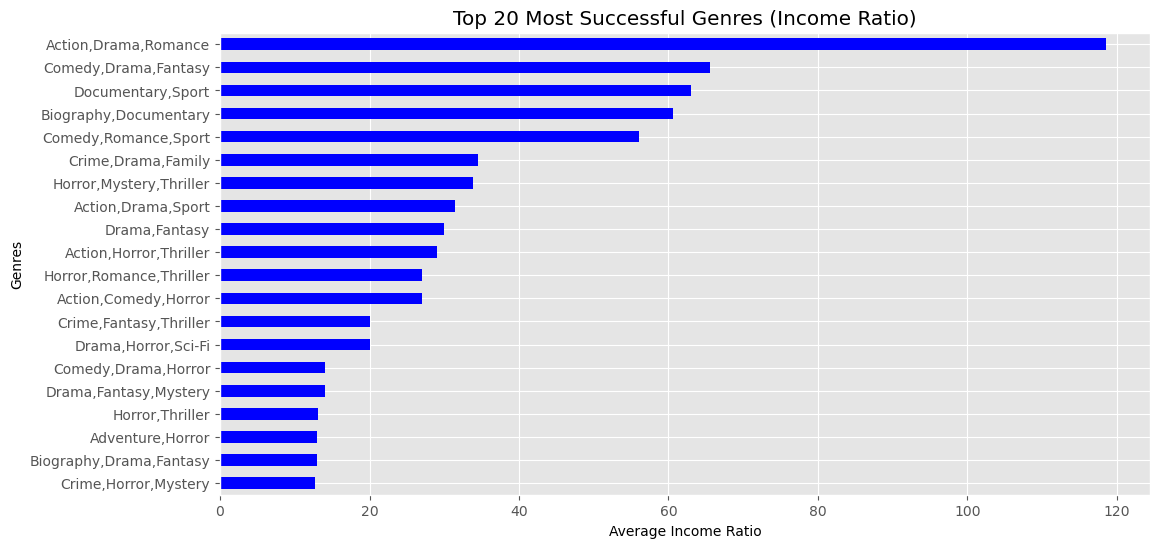

In [21]:
# Grouping and calculating average income ratio for each genre
genres_income_ratio = success_movies\
.groupby("genres")["income_ratio"].mean()

# Sorting genres by average income ratio in descending order
sorted_genres = genres_income_ratio.sort_values(ascending=True)

# Selecting the top 20 genres
top_20_genres = sorted_genres.tail(20)

# Set the plot style to "ggplot"
plt.style.use("ggplot")

# Plotting the top 20 genres and their average income ratios
plt.figure(figsize=(12, 6))
top_20_genres.plot(kind="barh", color= 'blue')
plt.title("Top 20 Most Successful Genres (Income Ratio)")
plt.xlabel("Average Income Ratio")
plt.ylabel("Genres")
plt.show()

* From the above plot we can observe that the combination of Action, Drama and Romance genres had the highest average income ratio.

Finding out the genres which are common in the successful movies.

In [22]:
# Counting the occurrence of each genre in the "success_movies"
top_genres = []
for genre in list(success_movies.genres):
    top_genres.extend(genre.split(","))

top_genres = pd.Series(top_genres).value_counts().sort_values()

#Secting the top five genres.
top_5_generes = top_genres[-5:]

In [23]:
#Finding the Most common genres in the top 50 most successful movies.
genres = list(success_movies.genres)[:50]
#Selecting the top 50 movies based on a success metric income_ratio
income_ratio = list(success_movies.income_ratio.astype(int))[:50]

top_50_genres = []
for gen in genres:
    top_50_genres.extend(gen.split(","))
top_50_genres = pd.Series(top_50_genres).value_counts().sort_values()

#top five common generes from 50 most successful movies.
top_5_gs = top_50_genres[-5:]

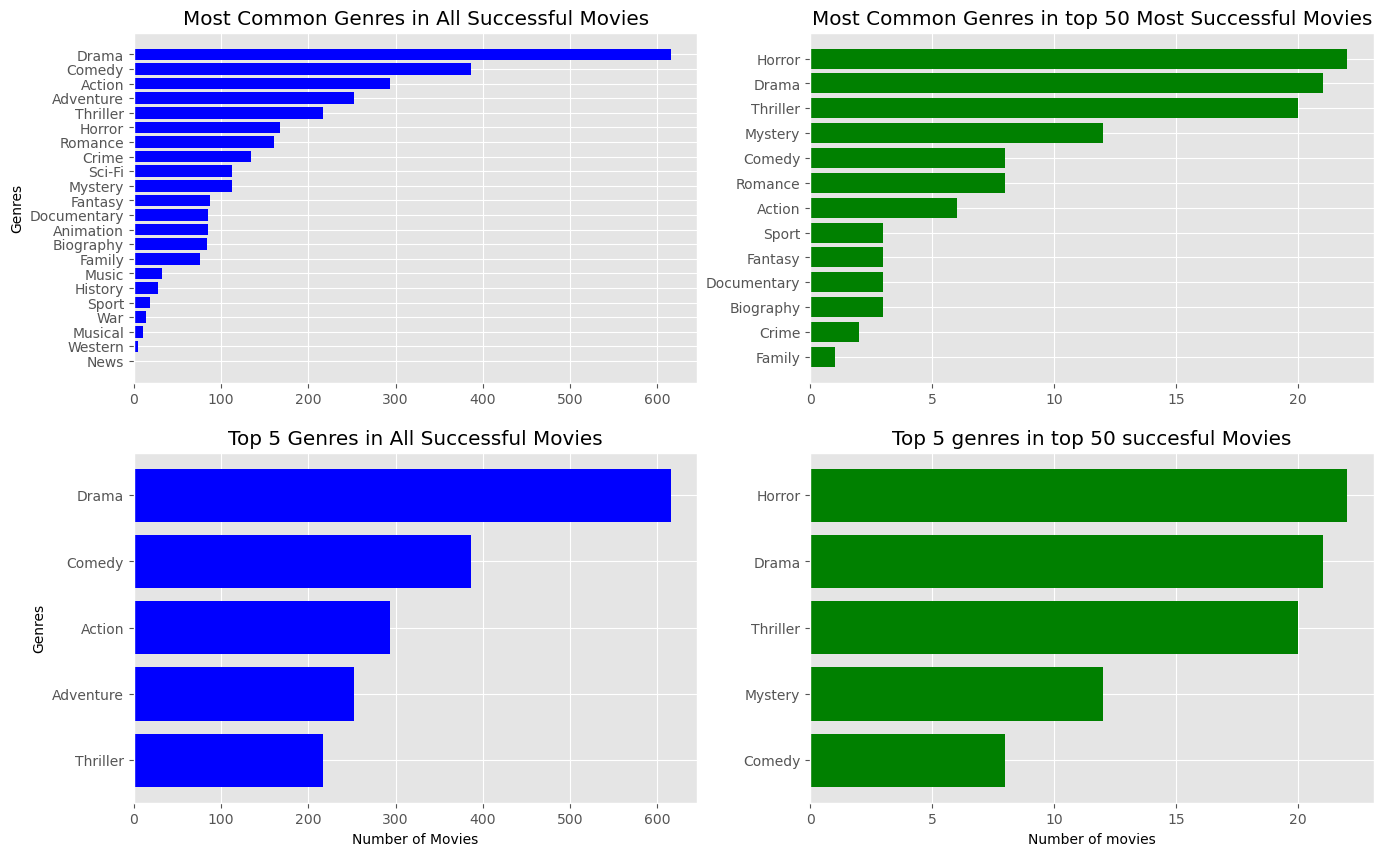

In [24]:
# plotting most common genres in top 50 and in all succesful movies
fig, ([ax1,ax2],[ax3,ax4]) = plt.subplots(figsize=(16,10), ncols=2, nrows=2)

ax1.barh(top_genres.index, top_genres.values, color = 'blue')
ax2.barh(top_50_genres.index, top_50_genres.values, color = 'green')
ax3.barh(top_5_generes.index, top_5_generes.values, color = 'blue')
ax4.barh(top_5_gs.index, top_5_gs.values, color = 'green')

ax1.set(ylabel = "Genres",
          title = "Most Common Genres in All Successful Movies")
ax2.set(title = "Most Common Genres in top 50 Most Successful Movies")

ax3.set(xlabel = "Number of Movies", ylabel = "Genres",
          title = "Top 5 Genres in All Successful Movies")
ax4.set(xlabel = "Number of movies",
          title = "Top 5 genres in top 50 succesful Movies");

* We can observe that Drama movies are the most common in all successful movies and Horror movies are the most common in top 50 successful movies.

Now, finding if the production budget a movie have an effect on the income ratio and also finding out the average production budget in successful movies.

In [25]:
#Calculating the mean, median, standard deviation
print("mean: ", success_movies.production_budget.mean())
print("median: ", success_movies.production_budget.median())
print("standard dev: ", success_movies.production_budget.std())

mean:  45881831.76394194
median:  22000000.0
standard dev:  57263963.10221424


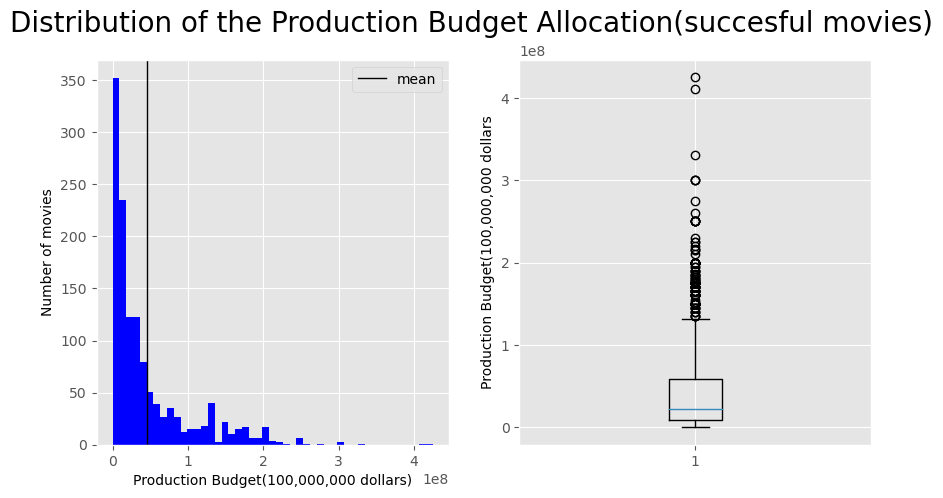

In [26]:
# Set the plot style to "ggplot"
plt.style.use("ggplot")

# Plotting the distribution of production_budget
fig, ax = plt.subplots(figsize = (10,5), ncols=2)

ax[0].hist(success_movies.production_budget, bins="auto", color= "blue")
ax[1].boxplot(success_movies.production_budget)

ax[0].axvline(success_movies.production_budget.mean(),
               c = "black", linewidth=1, linestyle='solid')
ax[0].set(xlabel = "Production Budget(100,000,000 dollars)",
           ylabel = "Number of movies")
ax[0].legend(["mean"])
ax[1].set(ylabel = "Production Budget(100,000,000 dollars")



fig.suptitle("Distribution of the Production Budget Allocation(succesful movies)", fontsize = 20);

* From the above we can observe that most movies were successful even when their production budget was below the mean of the production budgets.

* From the median we can see that $22,000,000 is a good production budget for a movie.

Finding if there's a correlation between production budget and the income ratio.

In [27]:
# Calculate the correlation coefficient
correlation = np.corrcoef(success_movies.production_budget, 
                          success_movies.income_ratio)[0, 1]

# Print the correlation coefficient
print("Correlation coefficient between production budget and income ratio:", correlation)

Correlation coefficient between production budget and income ratio: -0.12779602090121223


Plotting a scatter plot display the relationship between the production budget and the income ratio in successful movies.

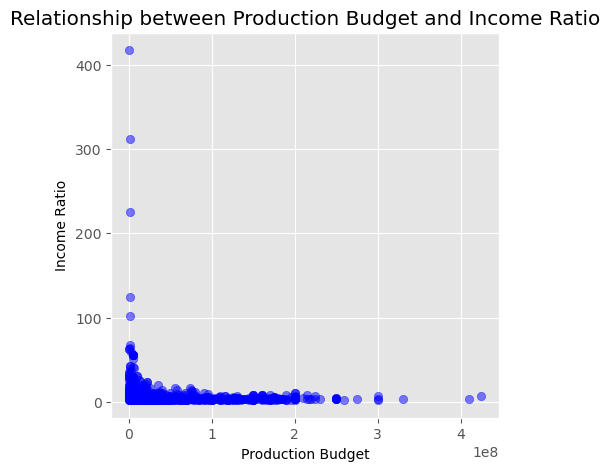

In [28]:
# Set the plot style to "ggplot"
plt.style.use("ggplot")

# Plotting the scatter plot
plt.figure(figsize=(5, 5))
plt.scatter(success_movies.production_budget, 
            success_movies.income_ratio, color='blue', alpha=0.5)
plt.title("Relationship between Production Budget and Income Ratio")
plt.xlabel("Production Budget")
plt.ylabel("Income Ratio")
plt.show()

* Correlation coefficient between production budget and income ratio is -0.12779602090121223.

* This means that there's a light inverse relation between production budget and income ratio. That is, more production budget results to low income ratio.

Finding when is the most lucrative time of year to release a movie.

In [29]:
# Define the 'pysqldf' function
pysqldf = lambda q: sqldf(q, globals())
#A dataframe to display the count of movies in each month.
# Calculate the number of movies in each month
months_count = pysqldf("""
                       SELECT COUNT(*) movie_count,
                              strftime("%m", release_date) release_month
                       FROM success_movies
                       GROUP BY release_month
                       ORDER BY release_month ASC
                       """)

# Convert month numbers to month names
months_count['release_month'] = months_count['release_month']\
       .apply(lambda x: calendar.month_name[int(x)])

# Sorting the results in descending order of average income ratio
months_count = months_count.sort_values('movie_count', ascending=False)

# Print the result
months_count

,movie_count,release_month
11,155,December
10,125,November
2,124,March
3,120,April
9,112,October
5,101,June
6,100,July
8,100,September
0,99,January
1,94,February


Plotting the number of movies released in each month.

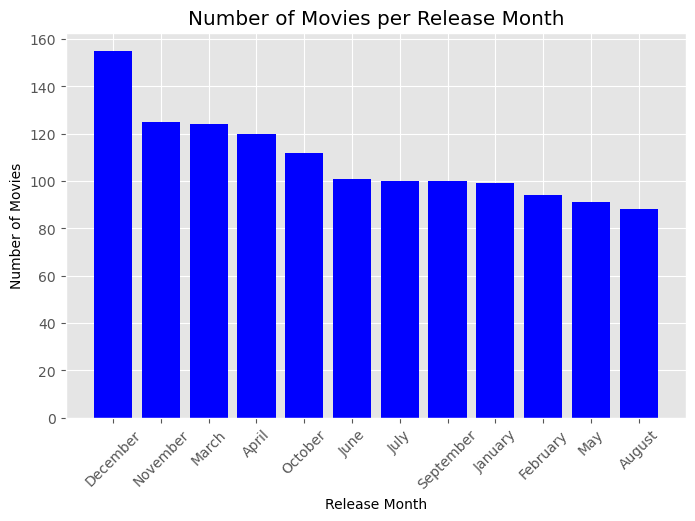

In [30]:
# Set the plot style to "ggplot"
plt.style.use("ggplot")

# Plotting the number of movies per release month
plt.figure(figsize=(8, 5))
plt.bar(months_count['release_month'], 
        months_count['movie_count'], color='blue')
plt.title("Number of Movies per Release Month")
plt.xlabel("Release Month")
plt.ylabel("Number of Movies")
plt.xticks(rotation=45)
plt.show()

* From the above, we can see that movie release months were fairly evenly distributed throughout the year, with the most releases in December and the least in August.

Calculating the average income ratio by release month.

In [36]:
# Extracting the month from the release_date column
success_movies['release_months'] = pd.to_datetime\
(success_movies['release_date']).dt.month

# Calculating the average income ratio by release month
months_income = success_movies.groupby('release_months')\
['income_ratio'].mean().reset_index()

# Sorting the results in descending order of average income ratio
months_income = months_income.sort_values('income_ratio', ascending=False)

# Converting the numeric months to month names
months_income['release_months'] = months_income['release_months'].apply(lambda x: calendar.month_name[x])

# Displaying the top records
months_income

,release_months,income_ratio
6,July,11.470000
0,January,11.020202
7,August,8.784091
10,November,8.088000
9,October,7.705357
3,April,6.441667
8,September,6.240000
5,June,6.029703
11,December,6.012903
4,May,5.285714


Plotting a bargraph to visualize the months and their respective income ratio.

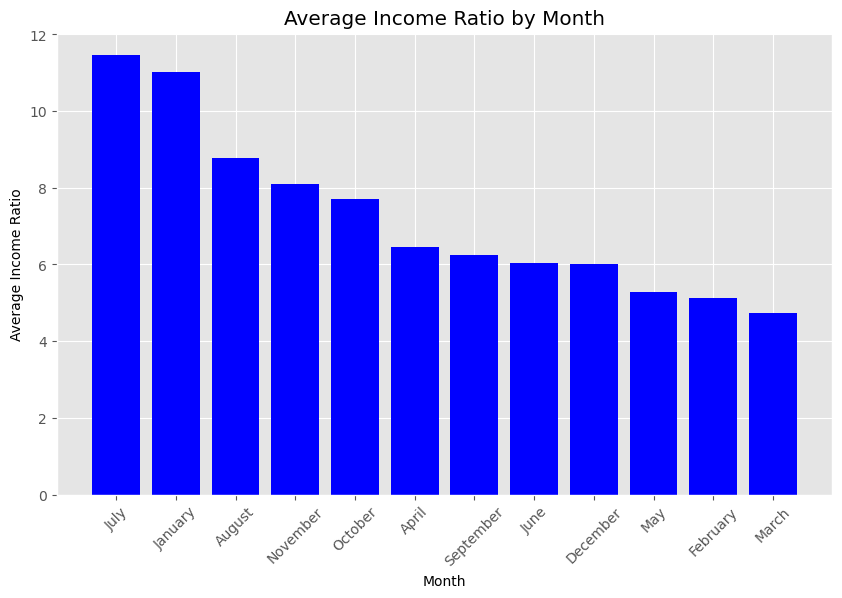

In [32]:
# Set the plot style to "ggplot"
plt.style.use("ggplot")

# Plotting the bar graph
plt.figure(figsize=(10, 6))
plt.bar(months_income['release_months'], 
        months_income['income_ratio'], color='blue')
plt.title("Average Income Ratio by Month")
plt.xlabel("Month")
plt.ylabel("Average Income Ratio")
plt.xticks(rotation=45)
plt.show()

* Considering the income ratio, we can oberseve that the best three months to produce a movie are on July, January and August.

Additional Attributes.

Finding crew members (directos) with a proven history of successful movies.

In [33]:
# Group the success_movies DataFrame by 'directors' 
#count the number of movies for each director
director_counts = success_movies.groupby('directors').size()

# Sort the counts in descending order
director_counts_sorted = director_counts.sort_values(ascending=False)

# Print the top 5 directors and their counts in descending order
print("Directors and their counts of successful movies in descending order:")
director_counts_sorted.head()


Directors and their counts of successful movies in descending order:


directors
nm0000229    7
nm1349376    5
nm1103162    5
nm0000142    5
nm0000095    4
dtype: int64

Visualization of the top directors and their total successful movies.

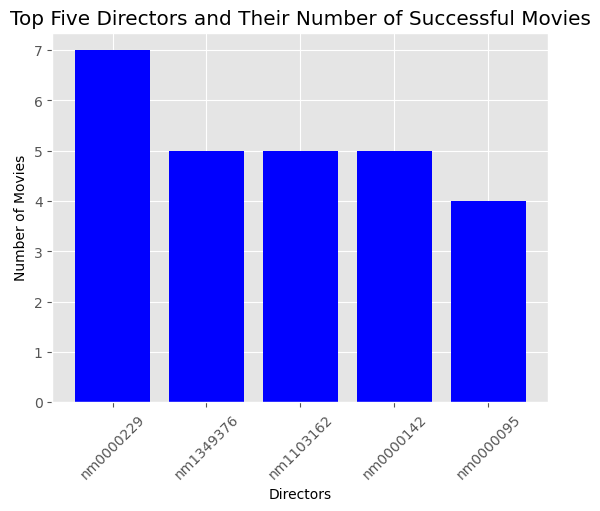

In [34]:
# Get the top five directors and their respective counts
top_directors = director_counts_sorted.head(5)

# Create a bar plot
plt.bar(top_directors.index, top_directors.values, color='blue')

# Set the plot title and labels
plt.title('Top Five Directors and Their Number of Successful Movies')
plt.xlabel('Directors')
plt.ylabel('Number of Movies')

# Rotate x-axis labels for better visibility if needed
plt.xticks(rotation=45)

# Display the plot
plt.show()

Finding movie genres by the director with many successful movies were found.

In [35]:
# Group the success_movies DataFrame by 'director' and count the number of movies for each director
director_counts = success_movies.groupby('directors').size()

# Find the director with the highest count
director_most_success = director_counts.idxmax()

# Filter the success_movies DataFrame for the movies directed by the director with the most success
movies_most_success = success_movies[success_movies['directors']
                                      == director_most_success]

# Get the genres and counts for the director with the most success
genres_counts = movies_most_success['genres'].value_counts()

# Print the results
print("Director with the most successful movies:", director_most_success)
print("Genres and counts for the director:")
print(genres_counts)

Director with the most successful movies: nm0000229
Genres and counts for the director:
Biography,Drama,History       2
Crime,Drama,Musical           1
Action,Adventure,Sci-Fi       1
Drama,History,Thriller        1
Action,Adventure,Animation    1
Drama,History,War             1
Name: genres, dtype: int64


* From the above dataframe, we can see the genres of top five most successful movies and their respetive principals.

### Conclusion
From the above analysis, we can conclude that:
* The combination of Action, Drama, and Romance genres had the highest average income ratio.
* Drama movies are the most common genre in successful movies.
* The production budget for a movie can be around $22,000,000.
* Movie release months were fairly distributed throughout the year and the best three months to release a moving considering the income ratio is on July, January, and August.

### Recommendations

* I would recommend that Microsoft release movies with three genres which include **Drama, Comedy and Thriller**
* Overall, the genre combination: **(Action, Drama, Romance)** topped with being the highest in terms of income ratio and it's worth taking note of.
* Production budget should be 22 to 24 million dollars.
* Release month should be July, January, or August and directed by a top-grossing director with a history of proven successful **Drama, Comedy, or Thriller** movies, such as **nm0000229**.